In [45]:
#Using Google Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

##Problem Statement

To predict which class a particular resource belongs to given the title of the resource. 

```
We are given references to news pages collected from an web aggregator in the period from 10-March-2014 to 10-August-2014. 
The resources are grouped into categories that represent pages discussing the same story. 

News categories included in this dataset include business(b); science and technology(t); entertainment(e); and health(h). 

This dataset comes from the UCI Machine Learning Repository.
In total there are 422937 resources available in the dataset.
The columns included in this dataset are:

    ID: the numeric ID of the article
    TITLE: the headline of the article
    CATEGORY: the category of the news item; one of: b:business, t:science and technology, e: entertainment and m:health

```


### Load the dataset


In [48]:
# read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/NLP_assesment/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/NLP_assesment/test.csv')

In [49]:
#Dropping df_train Id column : Id
train_id = df_train['Id']
df_train.drop(['Id'], axis=1, inplace=True)

In [50]:
#First look at data
df_train.head(10)

,TITLE,CATEGORY
0,Ukraine to get $18 billion rescue from IMF,b
1,McDonald's Abandons Headquarters to Avoid Prot...,b
2,New study finds evidence that Autism begins in...,m
3,Prime Minister Modi Says Meeting With Facebook...,t
4,New robot guides at Tokyo museum almost outper...,t
5,RCMP asked for delay of CRA's stolen data anno...,b
6,"'Sharknado 2' Sucks In 3.9 Million Viewers, Sp...",e
7,How Tim Cook Is Taking Steve Jobs' Advice to H...,t
8,WATCH: Huge aquarium breaks at Disney World re...,b
9,CURRENCIES: Dollar Falls Vs. Rivals; Euro Rebo...,b


In [51]:
# Data shape and columns
print(df_train.shape)
print(df_train.columns)

(337935, 2)
Index(['TITLE', 'CATEGORY'], dtype='object')


In [52]:
#Data Info
df_train.info()

# No missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337935 entries, 0 to 337934
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   TITLE     337935 non-null  object
 1   CATEGORY  337935 non-null  object
dtypes: object(2)
memory usage: 5.2+ MB


### Visualize and Preprocess the data

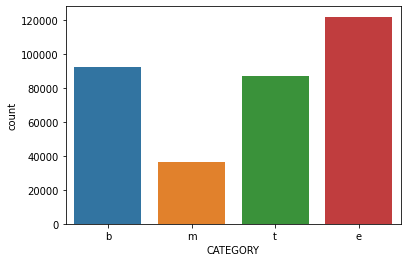

In [70]:
#Categories - target 
sns.countplot(x='CATEGORY', data=df_train)

In [53]:
# stopwords 
stop = set(stopwords.words('english'))

# retain only alphabets
df_train['TITLE'] = df_train['TITLE'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))


# convert to lowercase and tokenize
df_train['TITLE'] = df_train['TITLE'].apply(lambda x:x.lower().split())

# remove stopwords
df_train['TITLE'] = df_train['TITLE'].apply(lambda x:[i for i in x if i not in stop])

# join list elements
df_train['TITLE'] = df_train['TITLE'].apply(lambda x: ' '.join(x))


In [54]:
#Data after stopword removal, lowercase
df_train['TITLE'].head()

0                       ukraine get billion rescue imf
1      mcdonald abandons headquarters avoid protesters
2          new study finds evidence autism begins womb
3    prime minister modi says meeting facebook coo ...
4    new robot guides tokyo museum almost outperfor...
Name: TITLE, dtype: object

In [55]:
# split into training and test sets
X_train, X_valid, Y_train , Y_valid = train_test_split(df_train["TITLE"], df_train["CATEGORY"], test_size = 0.25,random_state=3)

### Vectorize with Bag-of-words and TF-IDF approach


In [56]:
# initialize count vectorizer
count_vectorizer = CountVectorizer()

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))

# fit and transform with count vectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_valid_count = count_vectorizer.transform(X_valid)

# fit and transform with tfidf vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

### Predicting with Multinomial Naive Bayes

In [57]:
# initialize multinomial naive bayes
nb_1 = MultinomialNB()
nb_2 = MultinomialNB()

# fit on count vectorizer training data
nb_1.fit(X_train_count,Y_train)

# fit on tfidf vectorizer training data
nb_2.fit(X_train_tfidf,Y_train)

# accuracy with count vectorizer
acc_count_nb = accuracy_score(nb_1.predict(X_valid_count),Y_valid)
# accuracy with tfidf vectorizer
acc_tfidf_nb = accuracy_score(nb_2.predict(X_valid_tfidf),Y_valid)
# display accuracies
print("Count vectorizer Accuracy:",acc_count_nb)
print('TF-IDF Accuracy:',acc_tfidf_nb)

Count vectorizer Accuracy: 0.9268974006912551
TF-IDF Accuracy: 0.9276312674589271


### Predicting with Logistic Regression


In [58]:
# initialize logistic regression
logreg_1 = OneVsRestClassifier(LogisticRegression(random_state=10))
logreg_2 = OneVsRestClassifier(LogisticRegression(random_state=10))

# fit on count vectorizer training data
logreg_1.fit(X_train_count,Y_train)

# fit on tfidf vectorizer training data
logreg_2.fit(X_train_tfidf,Y_train)

# accuracy with count vectorizer
acc_count_logreg = accuracy_score(logreg_1.predict(X_valid_count), Y_valid)

# accuracy with tfidf vectorizer
acc_tfidf_logreg = accuracy_score(logreg_2.predict(X_valid_tfidf), Y_valid)

# display accuracies
print("Count vectorizer Accuracy:",acc_count_logreg)
print('TF-IDF Accuracy:',acc_tfidf_logreg)


Count vectorizer Accuracy: 0.9446285687230718
TF-IDF Accuracy: 0.9407461767908717


### Prediction on the test data and creating the submission file.


In [59]:
#the Id column in a separate variable : Id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True)

#Test data shape and columns names
print(df_test.shape)
print(df_test.columns)


(84484, 1)
Index(['TITLE'], dtype='object')


In [60]:
#First look at test data
df_test.head()

,TITLE
0,A simple blood test to detect 'solid' cancers?
1,Mozilla appoints veteran Chris Beard as interi...
2,FDA Abruptly Reverses Stance on Wooden Aging B...
3,Cancer stats confirm value of colonoscopy
4,"Apple, Samsung playing games citing big number..."


In [61]:
# retain only alphabets
df_test['TITLE'] = df_test['TITLE'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))


# convert to lowercase and tokenize
df_test['TITLE'] = df_test['TITLE'].apply(lambda x:x.lower().split())

# remove stopwords
df_test['TITLE'] = df_test['TITLE'].apply(lambda x:[i for i in x if i not in stop])

# join list elements
df_test['TITLE'] = df_test['TITLE'].apply(lambda x: ' '.join(x))

In [62]:
#Data after stopword removal, lowercase
df_test.head()

,TITLE
0,simple blood test detect solid cancers
1,mozilla appoints veteran chris beard interim ceo
2,fda abruptly reverses stance wooden aging boar...
3,cancer stats confirm value colonoscopy
4,apple samsung playing games citing big numbers...


In [63]:
# X_test
X_test = df_test['TITLE']

# transform with count vectorizer
X_test_count = count_vectorizer.transform(X_test)

# transform with tfidf vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [64]:
#Predicting on count vectorizer using log reg (best result on valid)
y_test_pred = logreg_1.predict(X_test_count)

In [68]:
#Making df for submission
subm=pd.DataFrame({"Unnamed: 0": test_id, "CATEGORY": y_test_pred})
print(subm.head())

   Unnamed: 0 CATEGORY
0       86998        m
1      112926        t
2      280943        m
3       37154        m
4      152800        t


In [69]:
# To CSV for submission
subm.to_csv('CATEGORY.csv',index=False)

#from google.colab import files
#files.download('CATEGORY.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>